Author : Clara Martinez

Daily Challenge

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [ ]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

# Generate and explore a synthetic dataset
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

In [ ]:
# Convert to DataFrame for easier visualization
circle_df = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
print(circle_df.head())

         X0        X1  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0


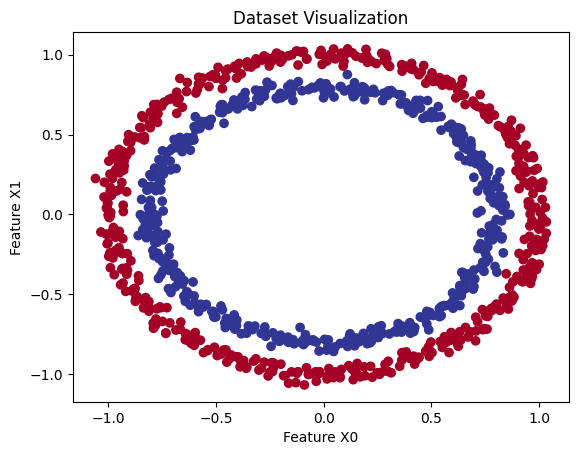

In [ ]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Dataset Visualization")
plt.xlabel("Feature X0")
plt.ylabel("Feature X1")
plt.show()

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a basic Neural Network model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [ ]:
# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

In [ ]:
# Train the model
model_1.fit(X_train, y_train, epochs=5)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4648 - loss: 4.2566   
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4781 - loss: 2.1557
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.7366 
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5042 - loss: 0.7090 
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4994 - loss: 0.6995 


In [ ]:
# Evaluate the improved model
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Improved Model - Loss: {loss}, Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4757 - loss: 0.7039  
Improved Model - Loss: 0.7015359401702881, Accuracy: 0.4950000047683716


In [ ]:
# Improve the model by adding more layers, neurons, and changing the optimizer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the improved model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Train the improved model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the improved model
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Improved Model - Loss: {loss}, Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.1003  
Improved Model - Loss: 0.10250779986381531, Accuracy: 1.0


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


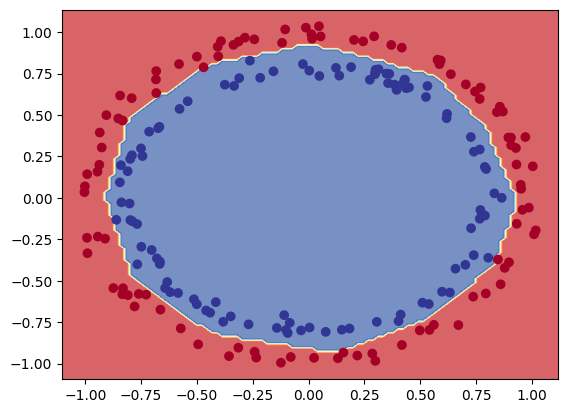

Key Takeaways:
- Understanding classification types is essential for model selection.
- Simple models with fewer layers may not be sufficient for complex patterns.
- Adding layers, using proper activation functions, and choosing the right optimizer can significantly improve model performance.
- Visualizing data and model predictions is crucial for debugging and improvements.


In [ ]:
# Function to visualize decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    # Binary classification check
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Visualize decision boundary for the improved model
plot_decision_boundary(model_2, X_test, y_test)

# Summarize Key Takeaways
print("Key Takeaways:")
print("- Understanding classification types is essential for model selection.")
print("- Simple models with fewer layers may not be sufficient for complex patterns.")
print("- Adding layers, using proper activation functions, and choosing the right optimizer can significantly improve model performance.")
print("- Visualizing data and model predictions is crucial for debugging and improvements.")

Practical Tutorial CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images (scale pixel values between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 97s 1us/step


Data augmentation after verifying the overfitting

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of tensor image data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
# Initialize the CNN
model = Sequential()

# Step 1 - First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Step 2 - First Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Second Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Step 4 - Second Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 5 - Flattening
model.add(Flatten())

# Step 6 - Fully Connected Layers
model.add(Dense(units=128, activation='relu'))  # Hidden layer with 128 neurons
model.add(Dense(units=10, activation='softmax'))  # Output layer with 10 neurons for 10 classes

C:\Users\moonb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=test_generator, epochs=5, batch_size=32)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 35ms/step - accuracy: 0.1001 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.0952 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.0968 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.0992 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027


In [ ]:
# Evaluate model performance on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0971 - loss: 2.3027
Test Accuracy: 0.1000


Image Classification Tutorial

In [ ]:
!pip install tensorflow tflearn opencv-python numpy tqdm matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=f7e038d7bf71ea1700eee423438aed16da3eb6fa0e166f9c4493889871a9097f
  Stored in directory: /root/.cache/pip/wheels/67/dd/7b/ddc1488c900739f410ea276e0e450d220f69d85c39e421f5f3
Successfully built tflearn


In [ ]:
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tflearn'

In [ ]:
from tensorflow.python.util.nest import is_sequence_or_composite

In [ ]:
pip uninstall Pillow

Found existing installation: pillow 11.1.0
Uninstalling pillow-11.1.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/PIL/*
    /usr/local/lib/python3.11/dist-packages/pillow-11.1.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libXau-154567c4.so.6.0.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libbrotlicommon-5b2eba61.so.1.1.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libbrotlidec-a621e7f2.so.1.1.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libfreetype-edd71024.so.6.20.1
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libharfbuzz-07d0ad17.so.0.61010.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libjpeg-0988b44a.so.62.4.0
    /usr/local/lib/python3.11/dist-packages/pillow.libs/liblcms2-525547ec.so.2.0.16
    /usr/local/lib/python3.11/dist-packages/pillow.libs/liblzma-a5872208.so.5.6.3
    /usr/local/lib/python3.11/dist-packages/pillow.libs/libopenjp2-ca16f087.so.2.5.3
    /usr/local/lib/pytho

In [ ]:
pip install Pillow==9.5.0

In [ ]:
import tflearn

In [ ]:
pip uninstall tflearn

Found existing installation: tflearn 0.5.0
Uninstalling tflearn-0.5.0:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/tflearn-0.5.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tflearn/*
Proceed (Y/n)? Y
  Successfully uninstalled tflearn-0.5.0


In [ ]:

pip install git+https://github.com/MihaMarkic/tflearn.git@fix/is_sequence_missing

  Cloning https://github.com/MihaMarkic/tflearn.git (to revision fix/is_sequence_missing) to /tmp/pip-req-build-gy97sv7w
  Running command git clone --filter=blob:none --quiet https://github.com/MihaMarkic/tflearn.git /tmp/pip-req-build-gy97sv7w
  Running command git checkout -b fix/is_sequence_missing --track origin/fix/is_sequence_missing
  Switched to a new branch 'fix/is_sequence_missing'
  Branch 'fix/is_sequence_missing' set up to track remote branch 'fix/is_sequence_missing' from 'origin'.
  Resolved https://github.com/MihaMarkic/tflearn.git to commit 6472b8588e758ff4a33a2764d4ee638bbd0e42f0
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=130659 sha256=012d172272629d488c0ca908a9d906404ba77ead6bbf5717ce073121901a66bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-y451nh_e/wheels/3f/c2/5d/cf0be63d86a0a58bd81a5c9d71531455fc1a46176b90c2adb6
Successfully built tflearn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/

 DCw4d2.ipynb  'Flower Classification.zip'


In [ ]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/Flower\ Classification.zip -d /content/Flower\ Classification

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/Flower Classification/Data/train/iris/17779345575_de76cd0e3a_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/17826727169_991cf11676_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/17858672081_4b4d071116_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/17885928250_451875aec2_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/17948299355_2161a031db_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/17959086836_3e706d918b_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/18054931376_23052f68d0_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/18059533553_186ccb451a_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/18076633321_400ea17b5a_c.jpg  
  inflating: /content/Flower Classification/Data/train/iris/18120244292_ea11fcc9c5_c.jpg  
  inflating:

Exercice 1

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Définir le chemin vers le répertoire des images
train_dir = '/content/Flower Classification/Data/train'
val_dir = '/content/Flower Classification/Data/val'

In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/

 DCw4d2.ipynb  'Flower Classification.zip'


In [ ]:
# Charger le dataset
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 13642 files belonging to 14 classes.
Using 10914 files for training.


In [ ]:
# Obtenir les noms des classes
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


In [ ]:
# Compter le nombre d'images par classe
image_count_per_class = {class_name: 0 for class_name in class_names}
for images, labels in train_ds:
    for label in labels:
        class_name = class_names[label]
        image_count_per_class[class_name] += 1

In [ ]:
print("Nombre d'images par classe:")
for class_name, count in image_count_per_class.items():
    print(f"{class_name}: {count}")

Nombre d'images par classe:
astilbe: 579
bellflower: 712
black_eyed_susan: 769
calendula: 808
california_poppy: 806
carnation: 746
common_daisy: 803
coreopsis: 822
dandelion: 825
iris: 839
rose: 775
sunflower: 830
tulip: 822
water_lily: 778


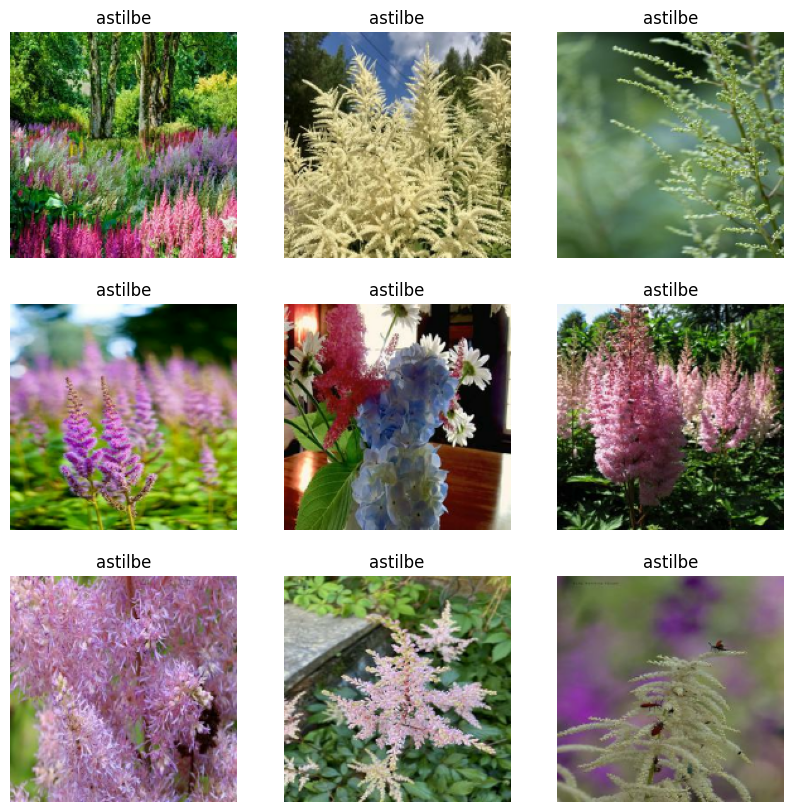

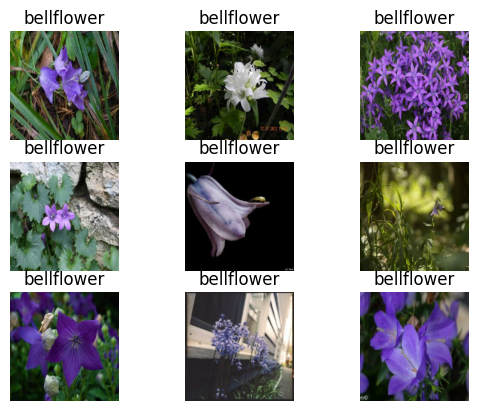

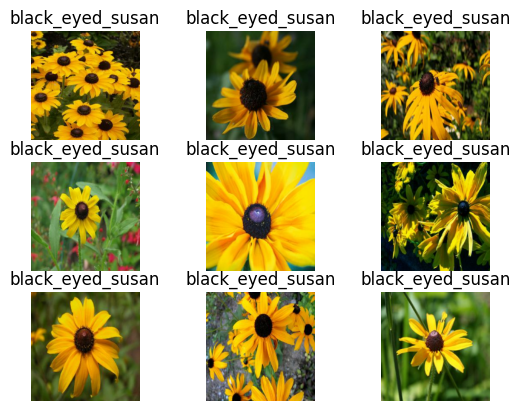

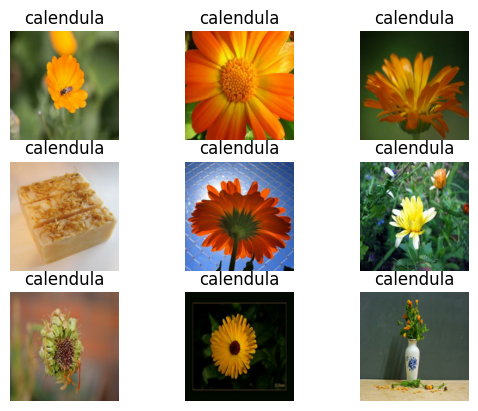

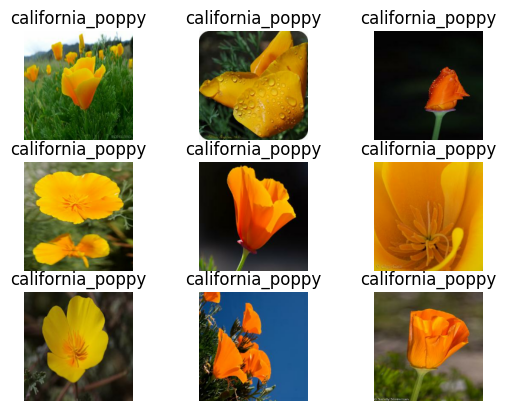

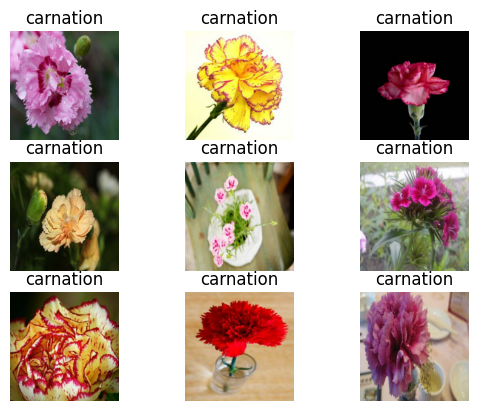

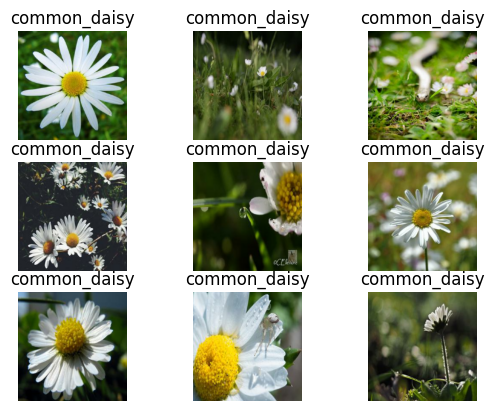

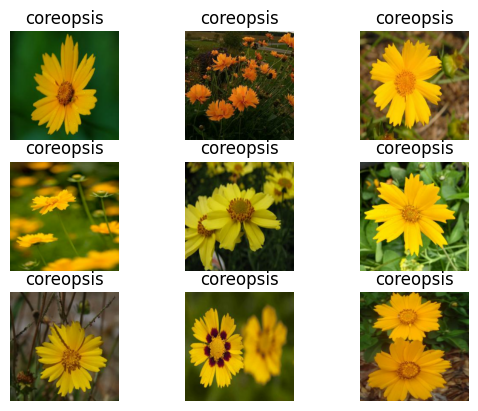

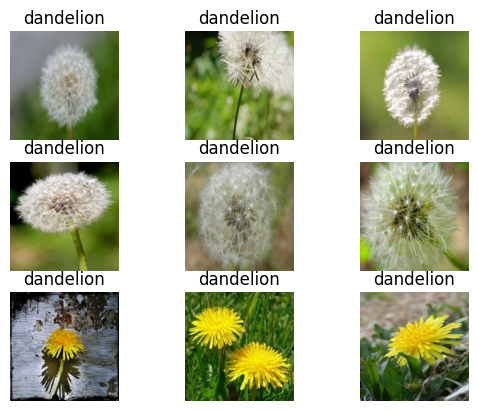

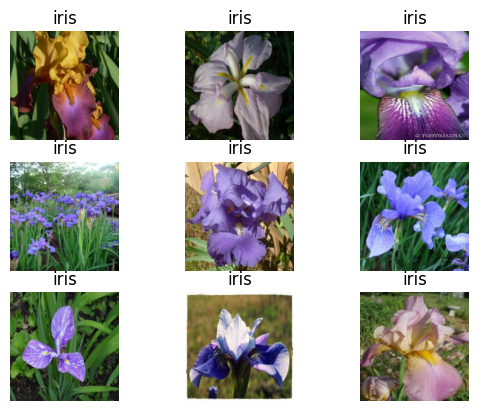

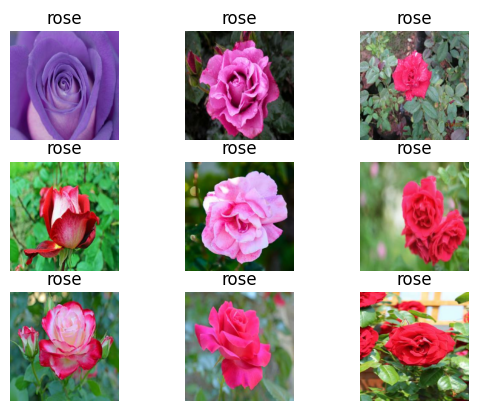

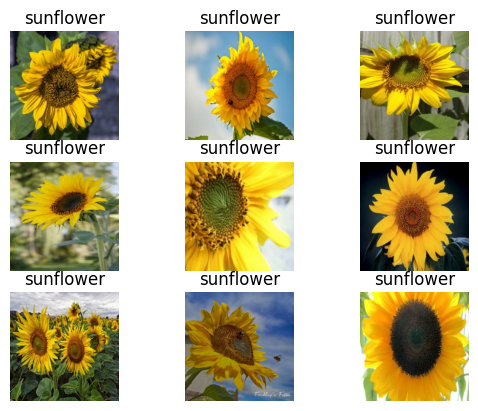

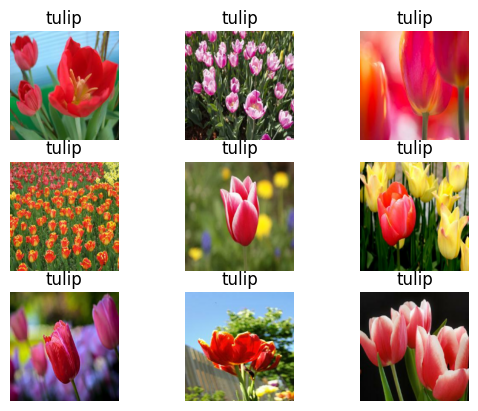

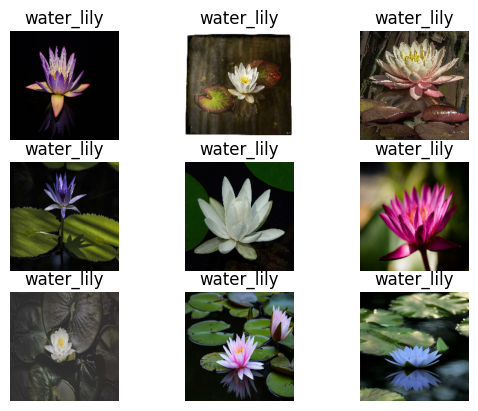

In [ ]:
# Fonction pour visualiser les images
def visualize_images(dataset, class_names):
    plt.figure(figsize=(10, 10))
    for class_index, class_name in enumerate(class_names):
        # Filtrer les images de la classe actuelle
        class_images = []
        for images, labels in dataset:
            for i in range(len(labels)):
                if labels[i] == class_index:
                    class_images.append(images[i].numpy().astype("uint8"))
                if len(class_images) == 9:
                    break
            if len(class_images) == 9:
                break

        # Afficher une grille 3x3 d'images pour la classe
        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.imshow(class_images[i])
            plt.title(class_name)
            plt.axis("off")
        plt.show()

# Visualiser les images
visualize_images(train_ds, class_names)

In [ ]:
# Analyse des images
print("Analyse des images:")
print("Les défis potentiels pour la classification des fleurs peuvent inclure:")
print("- Couleurs similaires entre différentes classes de fleurs.")
print("- Formes et tailles variées au sein de la même classe.")
print("- Variations d'éclairage et d'angle de prise de vue.")

Analyse des images:
Les défis potentiels pour la classification des fleurs peuvent inclure:
- Couleurs similaires entre différentes classes de fleurs.
- Formes et tailles variées au sein de la même classe.
- Variations d'éclairage et d'angle de prise de vue.


Exercice 2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Définir les dimensions des images
img_height = 180
img_width = 180
num_classes = len(class_names)  # Assurez-vous que class_names est défini

# Définir l'architecture du modèle
def create_model():
    model = models.Sequential()

    # Première couche de convolution
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    # Deuxième couche de convolution
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    # Troisième couche de convolution
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    # Couche de flattening
    model.add(layers.Flatten())

    # Couche dense
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())

    # Couche de sortie
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Créer le modèle
model = create_model()

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 89, 89, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 43, 43, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,650,190 (25.37 MB)

 Trainable params: 6,649,486 (25.37 MB)

 Non-trainable params: 704 (2.75 KB)

The goal is to build a CNN model that effectively classifies flower images. The model starts with three convolutional layers, which are used to progressively extract more complex features from the images. We begin with 32 filters and increase to 64 and 128 in the subsequent layers. This approach helps capture finer details as the model goes deeper. A kernel size of (3, 3) is chosen because it is standard and effective for capturing spatial hierarchies in images.

To reduce the spatial dimensions of the feature maps, max-pooling layers are used. This not only decreases the number of parameters but also helps prevent overfitting. A pooling size of (2, 2) is applied to down-sample the feature maps.

Batch normalization is added after each convolutional and dense layer. This technique stabilizes and speeds up training by normalizing the inputs, which is crucial for maintaining model performance.

The model includes a dense layer with 128 units to integrate the features extracted by the convolutional layers. To prevent overfitting, a dropout rate of 0.5 is applied, which randomly drops 50% of the neurons during training.

Finally, the output layer uses a softmax activation function, which is suitable for multi-class classification as it outputs probabilities for each class.

For experimentation, you can try adding or removing convolutional layers to see how it affects performance. Experimenting with different numbers of filters and kernel sizes can help optimize feature extraction. Additionally, adjusting the size of dense layers and dropout rates can help balance learning capacity and regularization.

This architecture is designed to balance complexity and efficiency, making it suitable for the task of flower classification. The choices are based on common practices in CNN design and are tailored to handle the dataset's characteristics, such as image size and class diversity.

Exercice 3

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Define the model architecture
def create_model(optimizer='adam', learning_rate=0.001):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),

        layers.Dense(len(class_names), activation='softmax')
    ])

    # Choose optimizer
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        opt = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Set up data
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(180, 180),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(180, 180),
    batch_size=batch_size)

# Experiment with different hyperparameters
optimizers = ['adam', 'rmsprop', 'sgd']
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 64]

best_accuracy = 0
best_params = {}

for optimizer in optimizers:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            print(f"Training with optimizer={optimizer}, learning_rate={lr}, batch_size={batch_size}")

            # Create and compile the model
            model = create_model(optimizer=optimizer, learning_rate=lr)

            # Set up callbacks
            early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)
            lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

            # Train the model
            history = model.fit(
                train_ds,
                validation_data=val_ds,
                epochs=10,
                batch_size=batch_size,
                callbacks=[early_stopping, lr_scheduler]
            )

            # Evaluate the model
            val_accuracy = max(history.history['val_accuracy'])
            print(f"Validation accuracy: {val_accuracy}")

            # Track the best performing hyperparameters
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_params = {
                    'optimizer': optimizer,
                    'learning_rate': lr,
                    'batch_size': batch_size
                }

print(f"Best hyperparameters: {best_params} with accuracy: {best_accuracy}")

Found 13642 files belonging to 14 classes.
Found 98 files belonging to 14 classes.
Training with optimizer=adam, learning_rate=0.001, batch_size=32
Epoch 1/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1253s 3s/step - accuracy: 0.3467 - loss: 2.0362 - val_accuracy: 0.5204 - val_loss: 1.5376 - learning_rate: 0.0010
Epoch 2/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1256s 3s/step - accuracy: 0.5541 - loss: 1.3010 - val_accuracy: 0.6531 - val_loss: 1.0088 - learning_rate: 0.0010
Epoch 3/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1260s 3s/step - accuracy: 0.6545 - loss: 1.0508 - val_accuracy: 0.5918 - val_loss: 1.1632 - learning_rate: 0.0010
Epoch 4/10
427/427 ━━━━━━━━━━━━━━━━━━━━ 1152s 3s/step - accuracy: 0.7143 - loss: 0.8626 - val_accuracy: 0.6837 - val_loss: 0.9016 - learning_rate: 0.0010
Epoch 5/10
253/427 ━━━━━━━━━━━━━━━━━━━━ 7:35 3s/step - accuracy: 0.7565 - loss: 0.7426